In [39]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [40]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [41]:
df.shape

(159, 6)

In [42]:
# data,target 분리
fish_input = df.iloc[:,1:].to_numpy()
fish_target = df['Species'].to_numpy()

# 판다스로 변경
# pd.DataFrame(fish_input)

In [43]:
# train,test세트 분리
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    fish_input,fish_target, random_state=42
)

In [44]:
df.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [45]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [46]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [47]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(train_scaled,train_target)

In [48]:
# print(lr.score(train_scaled,train_target))
# print(lr.score(test_scaled,test_target))

경사하강법

In [49]:
# 경사하강법 - 머신러닝을 훈련하는 방법, 최적화 하는 방법
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [50]:
# loss = 회귀(예측)함수 가져와서 적용
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.773109243697479
0.775


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [51]:
# 다시 재 훈련이 가능함.
# partial_fit : 이전 기울기,y절편을 가지고 다시 학습
sc.partial_fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


에포크, 과대/과소적합 문제

In [52]:
# 그래프를 그리기 위한 리스트
train_score = []
test_score = []

classes = np.unique(train_target)

In [53]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [54]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    sc1 = sc.score(train_scaled,train_target)
    train_score.append(sc1)
    sc2 = sc.score(test_scaled,test_target)
    test_score.append(sc2)   

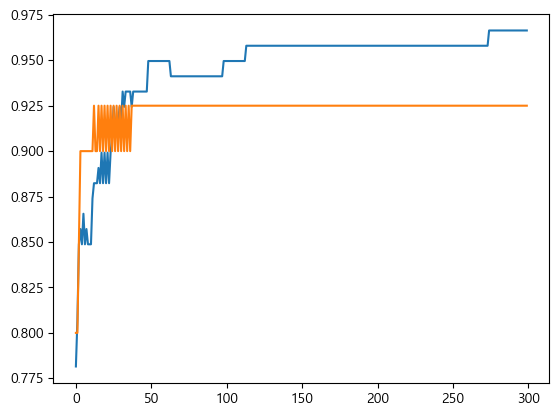

In [55]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [58]:
# tol = None 무조건 max_iter = 100만큼 반복시켜줌.
sc = SGDClassifier(loss='log_loss',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [ ]:
# 경사하강법
# 반복해서 머신러닝 훈련을 시켜 , 정답률을 높여주는 방법